# Load Libs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

# Exploratory Analysis

In [3]:
d = pd.read_csv("./data/bank-campaign.csv")

In [23]:
d.columns

Index([u'age', u'duration', u'campaign', u'pdays', u'previous',
       u'emp.var.rate', u'cons.price.idx', u'cons.conf.idx', u'euribor3m',
       u'nr.employed', u'job_admin.', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'job_unknown',
       u'marital_divorced', u'marital_married', u'marital_single',
       u'marital_unknown', u'education_basic.4y', u'education_basic.6y',
       u'education_basic.9y', u'education_high.school',
       u'education_illiterate', u'education_professional.course',
       u'education_university.degree', u'education_unknown', u'default_no',
       u'default_unknown', u'default_yes', u'housing_no', u'housing_unknown',
       u'housing_yes', u'loan_no', u'loan_unknown', u'loan_yes',
       u'contact_cellular', u'contact_telephone', u'month_apr', u'month_aug',
       u'month_dec', u'month_jul', u'mon

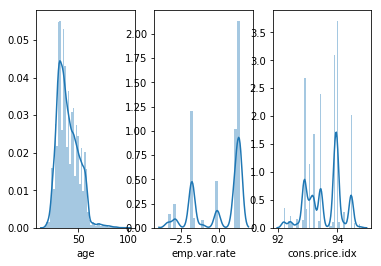

In [26]:
f, a = plt.subplots(ncols=3, nrows=1)
a = a.ravel()
sns.distplot(d['age'], ax=a[0])
sns.distplot(d['emp.var.rate'], ax=a[1])
sns.distplot(d['cons.price.idx'], ax=a[2])

In [28]:
print d.shape

(41188, 64)


In [35]:
pd.qcut(d['age'], 5, labels=False).head() #returns age order

0    4
1    4
2    2
3    2
4    4
Name: age, dtype: int64

In [63]:
y = d['target'].values

In [41]:
#?d.drop #this is differnt, 0 = drop from index, 1 = drop from column

In [42]:
X = d.drop('target', axis=1)

In [43]:
X.dtypes

age                        int64
duration                   int64
campaign                   int64
pdays                      int64
previous                   int64
emp.var.rate             float64
cons.price.idx           float64
cons.conf.idx            float64
euribor3m                float64
nr.employed              float64
job_admin.               float64
job_blue-collar          float64
job_entrepreneur         float64
job_housemaid            float64
job_management           float64
job_retired              float64
job_self-employed        float64
job_services             float64
job_student              float64
job_technician           float64
job_unemployed           float64
job_unknown              float64
marital_divorced         float64
marital_married          float64
marital_single           float64
marital_unknown          float64
education_basic.4y       float64
education_basic.6y       float64
education_basic.9y       float64
education_high.school    float64
          

In [46]:
d.target.value_counts() #we can use binarizier

no     36548
yes     4640
Name: target, dtype: int64

In [64]:
y = [1 if i == 'yes' else 0 for i in y] #make it 0,1

In [66]:
y = np.array(y, dtype=np.int)

In [68]:
np.bincount(y)

array([36548,  4640])

In [55]:
sum(X.dtypes == object)#make sure nothing is object

0

# Baseline Models

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1) #inverse alpha, smaller C bigger impact

In [70]:
lr.fit(X,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
from sklearn.metrics import confusion_matrix, classification_report

In [73]:
confusion_matrix(y, lr.predict(X)) #ok, not perfect

array([[35613,   935],
       [ 2750,  1890]])

In [76]:
print classification_report(y, lr.predict(X))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     36548
          1       0.67      0.41      0.51      4640

avg / total       0.90      0.91      0.90     41188



In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [82]:
kf = KFold(n_splits=5, shuffle=True)
lcv = cross_val_score(LogisticRegression(C=0.1), X,y,cv=kf,scoring='roc_auc')

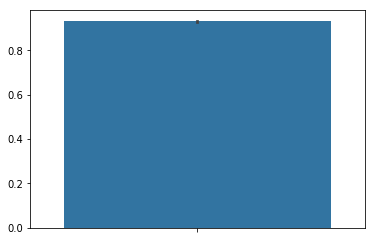

In [86]:
sns.barplot(lcv, orient='v') #AUC isn't too bad

Again, this is silly, but these are all possible parameters:


```'['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score'```

In [87]:
lr.predict(X)

array([0, 0, 0, ..., 0, 1, 0])

In [89]:
lr.predict_proba(X)

array([[ 0.98115518,  0.01884482],
       [ 0.99177377,  0.00822623],
       [ 0.98596755,  0.01403245],
       ..., 
       [ 0.65734949,  0.34265051],
       [ 0.40400405,  0.59599595],
       [ 0.73807398,  0.26192602]])

In [105]:
lr.classes_ #so this we know which one is which
#do not use class keyword

array([0, 1])

In [106]:
results =pd.DataFrame({'target':y, 'prob':lr.predict_proba(X)[:,1]})



#sns.distplot(lr.predict_proba(X)[:,0])
#sns.distplot(lr.predict_proba(X)[:,1]) #call multiple times, simply

[(0, 1)]

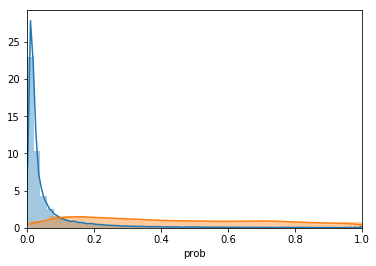

In [112]:
#OK, well, not perfect but works
g = sns.distplot(results.query('target == 0')['prob'])
g = sns.distplot(results.query('target == 1')['prob'])
g.set(xlim=(0,1))

In [114]:
from ggplot import *

/anaconda2/lib/python2.7/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/anaconda2/lib/python2.7/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [118]:
results.head()

,prob,target
0,0.018845,0
1,0.008226,0
2,0.014032,0
3,0.011613,0
4,0.020987,0


In [131]:
results.target = results.target.astype(object)

In [135]:
results.head()

,prob,target
0,0.018845,0
1,0.008226,0
2,0.014032,0
3,0.011613,0
4,0.020987,0


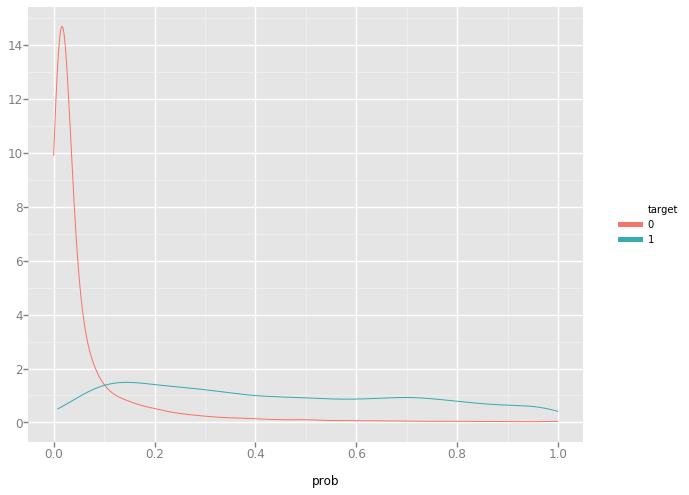

<ggplot: (7008832557)>

In [136]:
ggplot(aesthetics=aes(x='prob', color='target'), data=results) + geom_density()

In [137]:
#Looks like lots of NOs, but some yeses 

In [139]:
lr.score(X,y) #by default, this is not very good

0.91053219384286688

In [152]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

In [146]:
roc_auc_score(y, lr.predict_proba(X)[:,1]) #how do you get AUC when there's only 1,0, 0,1 with no probability?
#HMM - is it correct for auc?

0.93106730449894892

In [144]:
?roc_auc_score

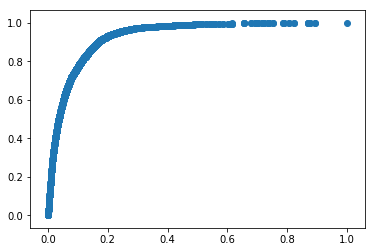

In [151]:
roc_curve_points = roc_curve(y, lr.predict_proba(X)[:,1])
plt.scatter(roc_curve_points[0],roc_curve_points[1])

In [172]:
to_plot = pd.DataFrame({'fpr':roc_curve_points[0], 'tpr':roc_curve_points[1]})

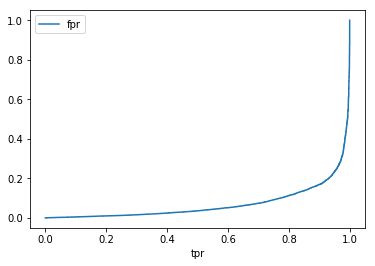

In [174]:
to_plot.plot('tpr','fpr') #it's convenient to use pandas to plot directly

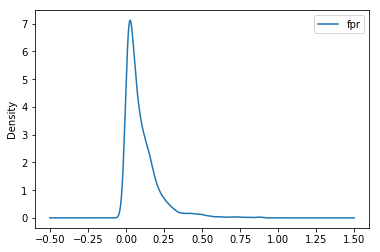

In [175]:
to_plot.plot('tpr', kind='density')

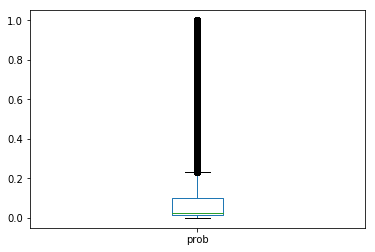

In [191]:
results.plot(by='target',y='prob',kind='box') #ok, pandas plot isn't all that great

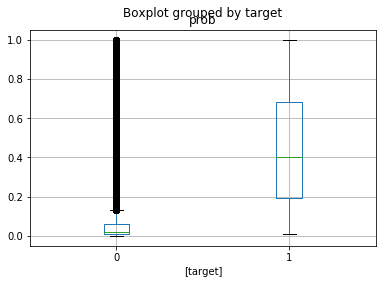

In [188]:
results.boxplot(by='target') #another way to do it

In [170]:
?roc_curve

In [153]:
pr_points = precision_recall_curve(y, lr.predict_proba(X)[:,1])

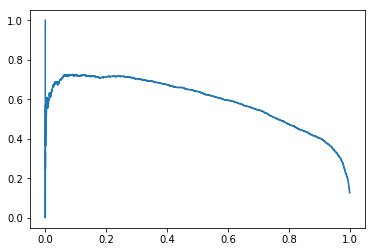

In [156]:
plt.plot(pr_points[1],pr_points[0]) #want x = recall, y = precision

In [158]:
from sklearn.calibration import calibration_curve

In [160]:
cali_curve = calibration_curve(y, lr.predict_proba(X)[:,1])

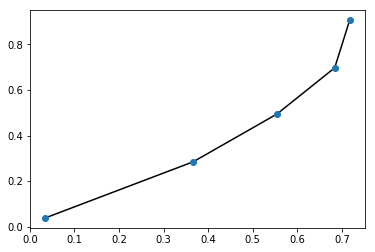

In [168]:
plt.plot(cali_curve[0], cali_curve[1], 'k')
plt.plot(cali_curve[0], cali_curve[1], 'o')

#gca -> returns curernt axis 
#gdf -> returns current figure
plt.legend() #this only works if it's pandas 

[Plotting Tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html)

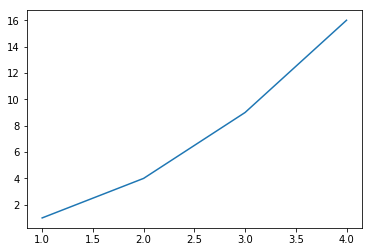